# Analysis of NFL play choice

## import desired packages

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [276]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## read in data and take a look at the dataset

In [277]:
df = pd.read_csv("NFL Play by Play 2009-2018 (v5).csv")

C:\Users\pspat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [342]:
df.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,home_timeouts_remaining,away_timeouts_remaining,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,893.0,1793.0,3593.0,Half1,0,1,0,1,1.0,0.0,14:53,PIT 42,10,5,(14:53) B.Roethlisberger pass short left to H....,pass,5.0,0,0,1.0,0,0,0,short,left,-3.0,8.0,NaN,NaN,3,3,3.0,3.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,2.092381,-2.092381,0.000000,0.000000,0.077907,-0.077907,-0.938735,1.016643,-0.938735,1.016643,-0.938735,0.938735,1.016643,-1.016643,-0.938735,0.938735,1.016643,-1.016643,0.546433,0.453567,0.546433,0.453567,0.004655,0.551088,0.448912,0.000000,0.000000,0.004655,-0.004655,-0.028383,0.033038,-0.028383,0.033038,-0.028383,0.028383,0.033038,-0.033038,-0.028383,0.028383,0.033038,-0.033038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,856.0,1756.0,3556.0,Half1,0,1,0,1,2.0,0.0,14:16,PIT 47,5,2,(14:16) W.Parker right end to PIT 44 for -3 ya...,run,-3.0,0,0,0.0,0,0,0,NaN,NaN,NaN,NaN,right,end,3,3,3.0,3.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,0.689621,-0.689621,-1.402760,1.402760,0.077907,-0.077907,NaN,NaN,0.000000,0.000000,-0.938735,0.938735,1.016643,-1.016643,-0.938735,0.938735,1.016643,-1.016643,0.551088,0.448912,0.551088,0.448912,-0.040295,0.510793,0.489207,-0.040295,0.040295,0.004655,-0.004655,NaN,NaN,0.000000,0.000000,-0.028383,0.028383,0.033038,-0.033038,-0.028383,0.028383,0.033038,-0.033038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,815.0,1715.0,3515.0,Half1,0,1,0,1,3.0,0.0,13:35,PIT 44,8,2,(13:35) (Shotgun) B.Roethlisberger pass i

## filter to non-special teams related plays or timeouts

In [279]:
df=df.loc[(df['play_type'] == 'pass')|(df['play_type'] == 'run')]

In [280]:
df=df.loc[df["two_point_attempt"] == 0] 

In [281]:
df=df.loc[df["timeout"] == 0] 

In [282]:
df=df.loc[df["extra_point_attempt"] == 0] 

In [283]:
df=df.loc[df["ydstogo"] > 0] 

In [284]:
df=df.loc[df["penalty"] == 0] 

## Begin dropping columns that are not relevant to analysis

In [285]:
cols = df.columns.tolist()
cols

['play_id',
 'game_id',
 'home_team',
 'away_team',
 'posteam',
 'posteam_type',
 'defteam',
 'side_of_field',
 'yardline_100',
 'game_date',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'game_seconds_remaining',
 'game_half',
 'quarter_end',
 'drive',
 'sp',
 'qtr',
 'down',
 'goal_to_go',
 'time',
 'yrdln',
 'ydstogo',
 'ydsnet',
 'desc',
 'play_type',
 'yards_gained',
 'shotgun',
 'no_huddle',
 'qb_dropback',
 'qb_kneel',
 'qb_spike',
 'qb_scramble',
 'pass_length',
 'pass_location',
 'air_yards',
 'yards_after_catch',
 'run_location',
 'run_gap',
 'field_goal_result',
 'kick_distance',
 'extra_point_result',
 'two_point_conv_result',
 'home_timeouts_remaining',
 'away_timeouts_remaining',
 'timeout',
 'timeout_team',
 'td_team',
 'posteam_timeouts_remaining',
 'defteam_timeouts_remaining',
 'total_home_score',
 'total_away_score',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'posteam_score_post',
 'defteam_score_post',
 'score_differential_post',
 'no_sc

In [286]:
df.drop(columns = [ 'extra_point_attempt',
 'two_point_attempt',
 'field_goal_attempt',
 'kickoff_attempt',
 'punt_attempt',
 'fumble',
 'complete_pass',
 'assist_tackle',
 'lateral_reception',
 'lateral_rush',
 'lateral_return',
 'lateral_recovery',
 'passer_player_id',
 'passer_player_name',
 'receiver_player_id',
 'receiver_player_name',
 'rusher_player_id',
 'rusher_player_name',
 'lateral_receiver_player_id',
 'lateral_receiver_player_name',
 'lateral_rusher_player_id',
 'lateral_rusher_player_name',
 'lateral_sack_player_id',
 'lateral_sack_player_name',
 'interception_player_id',
 'interception_player_name',
 'lateral_interception_player_id',
 'lateral_interception_player_name',
 'punt_returner_player_id',
 'punt_returner_player_name',
 'lateral_punt_returner_player_id',
 'lateral_punt_returner_player_name',
 'kickoff_returner_player_name',
 'kickoff_returner_player_id',
 'lateral_kickoff_returner_player_id',
 'lateral_kickoff_returner_player_name',
 'punter_player_id',
 'punter_player_name',
 'kicker_player_name',
 'kicker_player_id',
 'own_kickoff_recovery_player_id',
 'own_kickoff_recovery_player_name',
 'blocked_player_id',
 'blocked_player_name',
 'tackle_for_loss_1_player_id',
 'tackle_for_loss_1_player_name',
 'tackle_for_loss_2_player_id',
 'tackle_for_loss_2_player_name',
 'qb_hit_1_player_id',
 'qb_hit_1_player_name',
 'qb_hit_2_player_id',
 'qb_hit_2_player_name',
 'forced_fumble_player_1_team',
 'forced_fumble_player_1_player_id',
 'forced_fumble_player_1_player_name',
 'forced_fumble_player_2_team',
 'forced_fumble_player_2_player_id',
 'forced_fumble_player_2_player_name',
 'solo_tackle_1_team',
 'solo_tackle_2_team',
 'solo_tackle_1_player_id',
 'solo_tackle_2_player_id',
 'solo_tackle_1_player_name',
 'solo_tackle_2_player_name',
 'assist_tackle_1_player_id',
 'assist_tackle_1_player_name',
 'assist_tackle_1_team',
 'assist_tackle_2_player_id',
 'assist_tackle_2_player_name',
 'assist_tackle_2_team',
 'assist_tackle_3_player_id',
 'assist_tackle_3_player_name',
 'assist_tackle_3_team',
 'assist_tackle_4_player_id',
 'assist_tackle_4_player_name',
 'assist_tackle_4_team',
 'pass_defense_1_player_id',
 'pass_defense_1_player_name',
 'pass_defense_2_player_id',
 'pass_defense_2_player_name',
 'fumbled_1_team',
 'fumbled_1_player_id',
 'fumbled_1_player_name',
 'fumbled_2_player_id',
 'fumbled_2_player_name',
 'fumbled_2_team',
 'fumble_recovery_1_team',
 'fumble_recovery_1_yards',
 'fumble_recovery_1_player_id',
 'fumble_recovery_1_player_name',
 'fumble_recovery_2_team',
 'fumble_recovery_2_yards',
 'fumble_recovery_2_player_id',
 'fumble_recovery_2_player_name',
 'return_team',
 'return_yards',
 'penalty_team',
 'penalty_player_id',
 'penalty_player_name',
 'penalty_yards',
 'replay_or_challenge',
 'replay_or_challenge_result',
 'penalty_type',
 'defensive_two_point_attempt',
 'defensive_two_point_conv',
 'defensive_extra_point_attempt',
 'defensive_extra_point_conv'], inplace = True)

In [287]:
df.drop(columns = ['timeout', 'timeout_team','td_team','field_goal_result','kick_distance','extra_point_result','two_point_conv_result'], inplace = True)

## Understand missing value distribution and address

In [288]:
df.isna().sum()

play_id                            0
game_id                            0
home_team                          0
away_team                          0
posteam                            0
posteam_type                       0
defteam                            0
side_of_field                      0
yardline_100                       0
game_date                          0
quarter_seconds_remaining          0
half_seconds_remaining            17
game_seconds_remaining            14
game_half                          0
quarter_end                        0
drive                              0
sp                                 0
qtr                                0
down                               0
goal_to_go                         0
time                               0
yrdln                              0
ydstogo                            0
ydsnet                             0
desc                               0
play_type                          0
yards_gained                     207
s

## Subset the dataframe to columns of interest for current analysis

In [289]:
df_play_choice = df[['game_date','yardline_100', 'half_seconds_remaining','game_seconds_remaining','down','ydstogo','ydsnet','play_type','yards_gained','posteam','shotgun','score_differential','desc','posteam_timeouts_remaining']]

check and treat missing values

In [290]:
df_play_choice.isna().sum()

game_date                       0
yardline_100                    0
half_seconds_remaining         17
game_seconds_remaining         14
down                            0
ydstogo                         0
ydsnet                          0
play_type                       0
yards_gained                  207
posteam                         0
shotgun                         0
score_differential              0
desc                            0
posteam_timeouts_remaining      0
dtype: int64

In [291]:
df_play_choice.dropna(inplace=True)

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [292]:
df_play_choice['down']=df_play_choice['down'].astype(int)

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Play choice overall comparison

Text(0.5, 1.0, 'Overall Play Choice Selection 09-18 NFL')

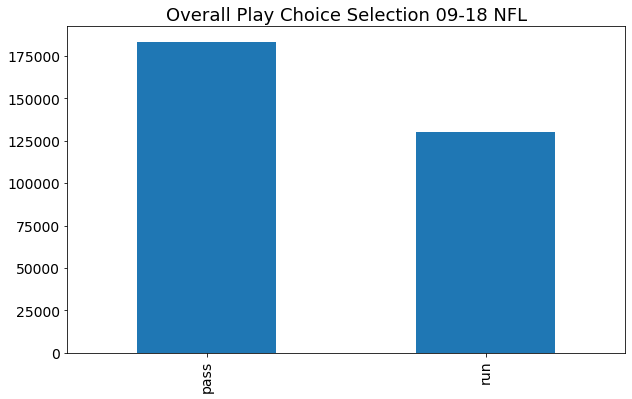

In [293]:
fig1=df_play_choice['play_type'].value_counts().plot(kind='bar', figsize = (10,6), fontsize=14)
plt.title('Overall Play Choice Selection 09-18 NFL', fontsize = 18)

Play selection by down

Text(0.5, 1.0, 'Play Selection by Down 09-18 NFL')

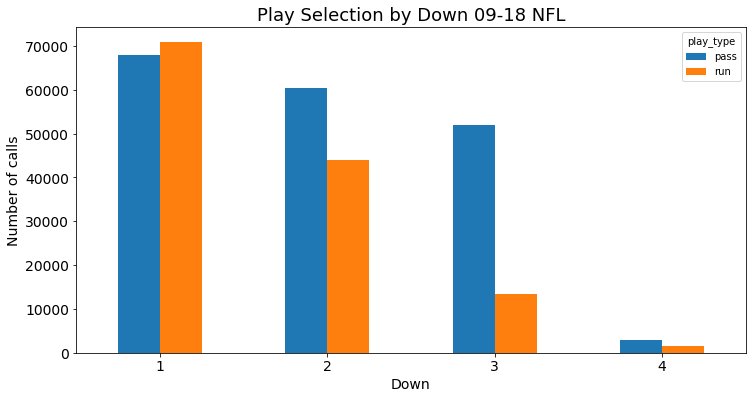

In [294]:
df_play_choice.groupby('down')['play_type'].value_counts().unstack(level=-1).plot(kind='bar',figsize=(12,6), fontsize= 14, rot = 0)
plt.xlabel('Down', fontsize=14)
plt.ylabel('Number of calls',fontsize = 14)
plt.title('Play Selection by Down 09-18 NFL', fontsize = 18)

## create groupings for yards to go

In [295]:
def ydstogo_grouping(row):
    if row['ydstogo'] in range(7,11):
        val = 3
    elif row['ydstogo'] in range(4,7):
        val = 2
    elif row['ydstogo'] in range(1,4):
        val = 1
    elif (row['ydstogo'] > 10) & (row['ydstogo'] < 20):
        val = 4 
    else:
        val = 5
    
    return val

In [296]:
df_play_choice['yds_to_go_grp'] = df_play_choice.apply(ydstogo_grouping, axis=1)
df_play_choice.loc[df_play_choice['posteam']=='JAC','posteam']='JAX'
df_play_choice.loc[df_play_choice['posteam']=='STL','posteam']='LAR'
df_play_choice.loc[df_play_choice['posteam']=='LA','posteam']='LAR'
df_play_choice.loc[df_play_choice['posteam']=='SD','posteam']='LAC'

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\pspat\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [297]:
df_play_choice.head()

,game_date,yardline_100,half_seconds_remaining,game_seconds_remaining,down,ydstogo,ydsnet,play_type,yards_gained,posteam,shotgun,score_differential,desc,posteam_timeouts_remaining,yds_to_go_grp
1,2009-09-10,58.0,1793.0,3593.0,1,10,5,pass,5.0,PIT,0,0.0,(14:53) B.Roethlisberger pass short left to H....,3.0,3
2,2009-09-10,53.0,1756.0,3556.0,2,5,2,run,-3.0,PIT,0,0.0,(14:16) W.Parker right end to PIT 44 for -3 ya...,3.0,2
3,2009-09-10,56.0,1715.0,3515.0,3,8,2,pass,0.0,PIT,1,0.0,(13:35) (Shotgun) B.Roethlisberger pass incomp...,3.0,3
5,2009-09-10,98.0,1696.0,3496.0,1,10,0,run,0.0,TEN,0,0.0,(13:16) C.Johnson up the middle to TEN 2 for n...,3.0,3
6,2009-09-10,98.0,1660.0,3460.0,2,10,4,pass,4.0,TEN,0,0.0,(12:40) K.Collins pass short left to A.Hall to...,3.0,3


Text(0.4, 0.35, 'Example for x-axis (2,3) represents 2nd down and yrd group 3,\n meaning 7-10 yards to go')

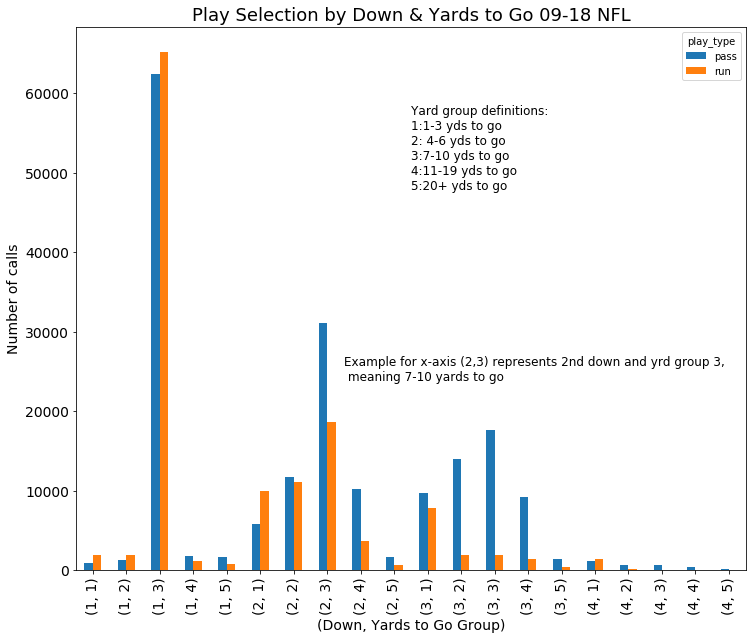

In [298]:
ax = df_play_choice.groupby(['down','yds_to_go_grp'])['play_type'].value_counts().unstack(level=-1).plot(kind='bar',figsize=(12,10),fontsize= 14, rot = 90)
plt.xlabel('(Down, Yards to Go Group)', fontsize=14)
plt.ylabel('Number of calls', fontsize = 14)
plt.title('Play Selection by Down & Yards to Go 09-18 NFL', fontsize = 18)
plt.text(0.5,0.7,'Yard group definitions: \n1:1-3 yds to go\n2: 4-6 yds to go\n3:7-10 yds to go\n4:11-19 yds to go\n5:20+ yds to go',size = 12,transform=ax.transAxes)
plt.text(0.4,0.35,'Example for x-axis (2,3) represents 2nd down and yrd group 3,\n meaning 7-10 yards to go',size = 12,transform=ax.transAxes)

## explore ratio of pass to run plays for each team

In [299]:
df_team=df_play_choice.groupby(['posteam'])['play_type'].value_counts()

In [300]:
df_team = df_team.unstack(level=-1)

In [301]:
df_team['pass_ratio'] = df_team['pass']/(df_team['pass']+df_team['run'])

In [302]:
df_team.sort_values(by='pass_ratio',ascending=False)

play_type,pass,run,pass_ratio
posteam,,,
DET,6456,3696,0.635934
ARI,6012,3645,0.622554
IND,6163,3809,0.618030
NO,6357,3930,0.617964
ATL,6106,3862,0.612560
GB,5941,3896,0.603944
NYG,5858,3864,0.602551
PIT,5875,3881,0.602194
TB,5711,3861,0.596636


## average yards gained by play type

In [303]:
df_play_choice.groupby('play_type').mean()['yards_gained']

play_type
pass    6.269083
run     4.336421
Name: yards_gained, dtype: float64

In [304]:
#create a first down flag column
df_play_choice['yrd_diff'] = df_play_choice['ydstogo']-df_play_choice['yards_gained']
df_play_choice['first_down_flag'] = df_play_choice['yrd_diff'].apply(lambda x: 0 if x > 0 else 1)

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## average yards gained by play type for a 'passing down"

In [305]:
test = df_play_choice.loc[(df_play_choice['down']==3)&(df_play_choice['yds_to_go_grp']==2)]

In [306]:
test.groupby('play_type').mean()['yards_gained']

play_type
pass    5.466348
run     5.435501
Name: yards_gained, dtype: float64

In [307]:
test.groupby('play_type').mean()['first_down_flag']

play_type
pass    0.434336
run     0.439628
Name: first_down_flag, dtype: float64

In [338]:
test.groupby('play_type').count()['yards_gained']

play_type
pass    14026
run      1938
Name: yards_gained, dtype: int64

interesting that running on a passing down (3 & four-six yards to go) results in slightly more first downs than passing.  Of course the number of pass calls heavily outweighs runs (unequal sample sizes)

# Create a measure of uniqueness for a play call via KNN approach

In [308]:
df_15_17 = df_play_choice[df_play_choice['game_date'].str.contains('2015|2016|2017')]

In [309]:
df_18 = df_play_choice[df_play_choice['game_date'].str.contains('2018')]

In [310]:
df_18.head()

,game_date,yardline_100,half_seconds_remaining,game_seconds_remaining,down,ydstogo,ydsnet,play_type,yards_gained,posteam,shotgun,score_differential,desc,posteam_timeouts_remaining,yds_to_go_grp,yrd_diff,first_down_flag
407337,2018-09-06,80.0,1800.0,3600.0,1,15,73,pass,10.0,ATL,0,0.0,(15:00) M.Ryan pass short right to J.Jones pus...,3.0,4,5.0,0
407338,2018-09-06,70.0,1762.0,3562.0,2,5,73,run,11.0,ATL,0,0.0,(14:22) J.Jones left end pushed ob at ATL 41 f...,3.0,2,-6.0,1
407339,2018-09-06,59.0,1726.0,3526.0,1,10,73,run,20.0,ATL,0,0.0,(13:46) D.Freeman right end to PHI 39 for 20 y...,3.0,3,-10.0,1
407340,2018-09-06,39.0,1690.0,3490.0,1,10,73,pass,0.0,ATL,0,0.0,(13:10) M.Ryan pass incomplete short right to ...,3.0,3,10.0,0
407341,2018-09-06,39.0,1685.0,3485.0,2,10,73,pass,0.0,ATL,1,0.0,(13:05) (Shotgun) M.Ryan pass incomplete short...,3.0,3,10.0,0


In [311]:
X = df_15_17[['yardline_100', 'half_seconds_remaining','game_seconds_remaining','down','ydstogo','play_type','score_differential']]

In [312]:
X['play_type_enconded'] = X['play_type'].apply(lambda x: 0 if x == 'run' else 1)

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [313]:
columns_to_scale  = ['yardline_100', 'half_seconds_remaining','game_seconds_remaining','ydstogo','score_differential']
encoded_cols = ['down','play_type_enconded']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_columns  = scaler.fit_transform(X[columns_to_scale]) 
encoded_columns = X[encoded_cols]

X_use = pd.DataFrame(np.concatenate([scaled_columns, encoded_columns], axis=1), columns =['yardline_100', 'half_seconds_remaining','game_seconds_remaining','ydstogo','score_differential','down','play_type'])

In [314]:
X_use.head()

,yardline_100,half_seconds_remaining,game_seconds_remaining,ydstogo,score_differential,down,play_type
0,1.119105,1.756055,1.772528,0.335911,0.146738,1.0,0.0
1,0.382958,1.684111,1.735332,0.335911,0.146738,1.0,1.0
2,0.014885,1.652751,1.719118,-1.933027,0.146738,2.0,0.0
3,-0.148703,1.582651,1.682876,0.335911,0.146738,1.0,1.0
4,-0.721262,1.501484,1.640911,0.335911,0.146738,1.0,0.0


In [315]:
from sklearn.neighbors import NearestNeighbors

In [316]:
nbrs = NearestNeighbors(n_neighbors=5)

In [317]:
nbrs.fit(X_use)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [318]:
X_18 = df_18[['yardline_100', 'half_seconds_remaining','game_seconds_remaining','down','ydstogo','play_type','score_differential']]
X_18['play_type_encoded'] = X_18['play_type'].apply(lambda x: 0 if x == 'run' else 1)
columns_to_scale  = ['yardline_100', 'half_seconds_remaining','game_seconds_remaining','ydstogo','score_differential']
encoded_cols = ['down','play_type_encoded']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_columns  = scaler.fit_transform(X_18[columns_to_scale]) 
encoded_columns = X_18[encoded_cols]

X_18_use = pd.DataFrame(np.concatenate([scaled_columns, encoded_columns], axis=1), columns =['yardline_100', 'half_seconds_remaining','game_seconds_remaining','ydstogo','score_differential','down','play_type'])

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [319]:
distances, indices = nbrs.kneighbors(X_18_use)

In [320]:
mean_dist_nbrs = np.mean(distances,axis =1)

In [321]:
df_18['mean_dist_nbrs'] = mean_dist_nbrs

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [322]:
df_18.head()

,game_date,yardline_100,half_seconds_remaining,game_seconds_remaining,down,ydstogo,ydsnet,play_type,yards_gained,posteam,shotgun,score_differential,desc,posteam_timeouts_remaining,yds_to_go_grp,yrd_diff,first_down_flag,mean_dist_nbrs
407337,2018-09-06,80.0,1800.0,3600.0,1,15,73,pass,10.0,ATL,0,0.0,(15:00) M.Ryan pass short right to J.Jones pus...,3.0,4,5.0,0,0.123975
407338,2018-09-06,70.0,1762.0,3562.0,2,5,73,run,11.0,ATL,0,0.0,(14:22) J.Jones left end pushed ob at ATL 41 f...,3.0,2,-6.0,1,0.042499
407339,2018-09-06,59.0,1726.0,3526.0,1,10,73,run,20.0,ATL,0,0.0,(13:46) D.Freeman right end to PHI 39 for 20 y...,3.0,3,-10.0,1,0.024415
407340,2018-09-06,39.0,1690.0,3490.0,1,10,73,pass,0.0,ATL,0,0.0,(13:10) M.Ryan pass incomplete short right to ...,3.0,3,10.0,0,0.046859
407341,2018-09-06,39.0,1685.0,3485.0,2,10,73,pass,0.0,ATL,1,0.0,(13:05) (Shotgun) M.Ryan pass incomplete short...,3.0,3,10.0,0,0.073398


In [323]:
a = df_18.groupby('posteam').mean()['mean_dist_nbrs']
a.sort_values(ascending = False)

posteam
BUF    0.327350
ARI    0.279411
WAS    0.274176
CIN    0.269365
NYJ    0.268590
TB     0.266512
CHI    0.263042
TEN    0.261147
DET    0.261083
BAL    0.259257
NO     0.258585
JAX    0.257180
NYG    0.256384
PHI    0.256293
KC     0.255615
LAC    0.254780
GB     0.251945
MIA    0.251757
CLE    0.250870
SF     0.250402
DEN    0.249382
NE     0.248572
SEA    0.248541
LAR    0.246030
HOU    0.245100
MIN    0.243358
ATL    0.243278
CAR    0.240828
PIT    0.240686
DAL    0.240679
OAK    0.239393
IND    0.237567
Name: mean_dist_nbrs, dtype: float64

low variance here partially due to the fact that each teams play call is within the dataset so its likely that the nearest neighbors to given play call is another play call by teh same team in a similar field situation

## Predicting play calls

In [324]:
df_play_choice['play_type_encoded'] = df_play_choice['play_type'].apply(lambda x: 0 if x == 'run' else 1)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_play_choice['posteam_encoded'] = le.fit_transform(df_play_choice['posteam'])

df_plays_15_17 = df_play_choice[df_play_choice['game_date'].str.contains('2015|2016|2017')]
df_plays_18 = df_play_choice[df_play_choice['game_date'].str.contains('2018')]

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [325]:
X_train = df_plays_15_17[['yardline_100', 'half_seconds_remaining','down','ydstogo','score_differential','posteam_encoded','shotgun']]
y_train = df_plays_15_17['play_type_encoded']

In [326]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [327]:
from sklearn.metrics import classification_report, confusion_matrix
X_test  = df_plays_18[['yardline_100', 'half_seconds_remaining','down','ydstogo','score_differential','posteam_encoded','shotgun']]
y_actual = df_plays_18['play_type_encoded']
y_pred = xgb_classifier.predict(X_test)

print(classification_report(y_actual,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.61      0.64     11710
           1       0.75      0.80      0.77     17237

    accuracy                           0.72     28947
   macro avg       0.71      0.70      0.71     28947
weighted avg       0.72      0.72      0.72     28947



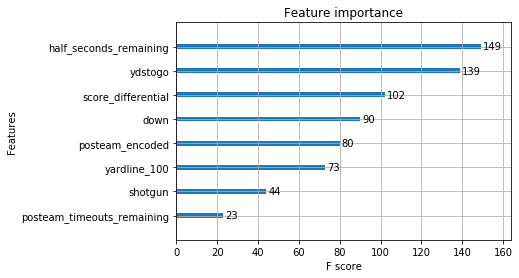

In [328]:
xgb.plot_importance(xgb_classifier)

randomized grid search for optimizing parameters

In [335]:
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,roc_auc_score
from sklearn.model_selection import KFold

clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': [100,200,300,500],
              'learning_rate': [0.01,0.05,0.1,0.5,1.0],
              'subsample': [0.3,0.5,0.6,0.7,0.9],
              'max_depth': [3,4,5,6,8],
              'colsample_bytree': [0.5,0.6,0.7,0.8,0.9],
              'min_child_weight': [1, 2, 3, 4]
             }

numFolds = 5
kfold_5 = KFold(n_splits= numFolds, shuffle = True)

clf = RandomizedSearchCV(clf_xgb, 
                         param_distributions = param_dist,
                         cv = kfold_5,  
                         n_iter = 15, # you want 5 here not 25 if I understand you correctly 
                         scoring = 'f1', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  2.3min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   error_score=0,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logisti...
                   param_distributions={'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.5,
                  

In [336]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6648256951428502, verbosity=1)

In [337]:
y_pred = clf.predict(X_test)
print(classification_report(y_actual,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.62      0.65     11710
           1       0.75      0.80      0.78     17237

    accuracy                           0.73     28947
   macro avg       0.71      0.71      0.71     28947
weighted avg       0.72      0.73      0.72     28947



## Predicting the play selection of a given team

In [58]:
df_chi = df_play_choice[df_play_choice['posteam']=='CHI']

In [59]:
df_chi.head()

,game_date,yardline_100,half_seconds_remaining,game_seconds_remaining,down,ydstogo,ydsnet,play_type,yards_gained,posteam,shotgun,score_differential,desc,yds_to_go_grp,yrd_diff,first_down_flag,play_type_encoded,posteam_encoded
2228,2009-09-13,61.0,1599.0,3399.0,1,10,0,pass,0.0,CHI,0,0.0,(11:39) J.Cutler pass incomplete short right t...,3,10.0,0,1,5
2229,2009-09-13,61.0,1597.0,3397.0,2,10,2,run,2.0,CHI,0,0.0,(11:37) M.Forte left guard to CHI 41 for 2 yar...,3,8.0,0,0,5
2230,2009-09-13,59.0,1557.0,3357.0,3,8,2,pass,0.0,CHI,1,0.0,"(10:57) (No Huddle, Shotgun) J.Cutler pass inc...",3,8.0,0,1,5
2240,2009-09-13,82.0,1333.0,3133.0,1,10,20,pass,20.0,CHI,0,0.0,(7:13) J.Cutler pass deep left to D.Hester pus...,3,-10.0,1,1,5
2241,2009-09-13,62.0,1319.0,3119.0,1,10,23,run,3.0,CHI,0,0.0,(6:59) (No Huddle) M.Forte up the middle to CH...,3,7.0,0,0,5


In [60]:
df_chi_15_17 = df_chi[df_chi['game_date'].str.contains('2015|2016|2017')]
df_chi_18 = df_chi[df_chi['game_date'].str.contains('2018')]

In [61]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report

In [62]:
xgb_classifier = xgb.XGBClassifier(learning_rate=0.1,max_depth =3)

In [63]:
X_train = df_chi_15_17[['yardline_100', 'half_seconds_remaining','game_seconds_remaining','down','ydstogo','score_differential']]
y_train = df_chi_15_17['play_type_encoded']

In [64]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [65]:
X_test  = df_chi_18[['yardline_100', 'half_seconds_remaining','game_seconds_remaining','down','ydstogo','score_differential']]
y_actual = df_chi_18['play_type_encoded']

y_pred = xgb_classifier.predict(X_test)

In [66]:
print(classification_report(y_actual,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.79      0.65       398
           1       0.75      0.49      0.59       504

    accuracy                           0.62       902
   macro avg       0.65      0.64      0.62       902
weighted avg       0.66      0.62      0.62       902



## Analysis of play selection through time

In [67]:
df_play_choice['year'] = df_play_choice['game_date'].apply(lambda x:x[:4])

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
time_df = df_play_choice.groupby(['year','play_type_encoded']).count()['down']

In [69]:
time_df = time_df.unstack(level=-1)

In [70]:
time_df['pass_ratio']= time_df[1]/(time_df[1]+time_df[0])
time_df['run_ratio']= time_df[0]/(time_df[1]+time_df[0])

In [71]:
df_yearly_scoring = pd.read_csv('yearly_scoring_nfl.csv')
df_yearly_scoring.drop(index = 0, inplace = True)
df_yearly_scoring.set_index('Year', inplace=True)
df_yearly_scoring.sort_index(inplace=True)
scoring_series = df_yearly_scoring['Avg Pts per Team']
scoring_series = list(scoring_series)
time_df['avg_pts_per_team'] = scoring_series
# time_df = pd.merge(time_df, df_yearly_scoring, how = 'left',left_on = 'year',right_on = 'Year')

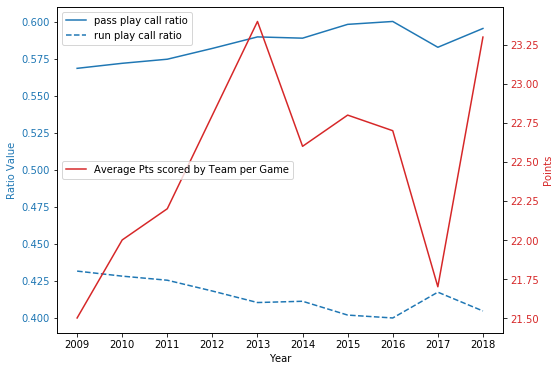

In [72]:

fig, ax1 = plt.subplots(figsize=(8, 6))
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Ratio Value', color=color)
ax1.plot(time_df.index,time_df['pass_ratio'],color = color, label= 'pass play call ratio')
ax1.plot(time_df.index,time_df['run_ratio'], color = color, linestyle = 'dashed', label='run play call ratio')
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Points', color=color)
ax2.plot(time_df.index,time_df['avg_pts_per_team'], color=color,label= 'Average Pts scored by Team per Game')
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend(loc='best')
ax2.legend(loc='center left')

In [184]:
time_df_team = df_play_choice.groupby(['year','play_type_encoded','posteam']).count()['down']
time_df_team = time_df_team.unstack(level=1)
time_df_team['pass_ratio']= time_df_team[1]/(time_df_team[1]+time_df_team[0])
time_df_team['run_ratio']= time_df_team[0]/(time_df_team[1]+time_df_team[0])
time_df_team

play_type_encoded    0    1  pass_ratio  run_ratio
year posteam                                      
2009 ARI           322  572    0.639821   0.360179
     ATL           391  541    0.580472   0.419528
     BAL           422  510    0.547210   0.452790
     BUF           371  448    0.547009   0.452991
     CAR           469  460    0.495156   0.504844
     CHI           331  543    0.621281   0.378719
     CIN           467  471    0.502132   0.497868
     CLE           438  449    0.506201   0.493799
     DAL           383  539    0.584599   0.415401
     DEN           402  517    0.562568   0.437432
     DET           373  570    0.604454   0.395546
     GB            380  556    0.594017   0.405983
     HOU           372  567    0.603834   0.396166
     IND           332  563    0.629050   0.370950
     JAX           401  514    0.561749   0.438251
     KC            391  542    0.580922   0.419078
     LAC           394  489    0.553794   0.446206
     LAR           377  536    0.587076   0.412924
     MIA           476  531    0.527309   0.472691
     MIN           411  540    0.567823   0.432177
     NE            420  561    0.571865   0.428135
     NO            411  525    0.560897   0.439103
     NYG           413  529    0.561571   0.438429
     NYJ           531  393    0.425325   0.574675
     OAK           377  474    0.556992   0.443008
     PHI           351  543    0.607383   0.392617
     PIT           372  543    0.593443   0.406557
     SEA           358  605    0.628245   0.371755
     SF            323  518    0.615933   0.384067
     TB            372  509    0.577753   0.422247
     TEN           441  459    0.510000   0.490000
     WAS           357  523    0.594318   0.405682
2010 ARI           302  565    0.651672   0.348328
     ATL           476  577    0.547958   0.452042
     BAL           467  526    0.529708   0.470292
     BUF           412  539    0.566772   0.433228
     CAR           436  511    0.539599   0.460401
     CHI           394  502    0.560268   0.439732
     CIN           402  587    0.593529   0.406471
     CLE           426  462    0.520270   0.479730
     DAL           407  600    0.595829   0.404171
     DEN           381  624    0.620896   0.379104
     DET           391  642    0.621491   0.378509
     GB            412  568    0.579592   0.420408
     HOU           399  614    0.606120   0.393880
     IND           366  679    0.649761   0.350239
     JAX           487  508    0.510553   0.489447
     KC            547  471    0.462672   0.537328
     LAC           432  570    0.568862   0.431138
     LAR           429  602    0.583899   0.416101
     MIA           434  578    0.571146   0.428854
     MIN           429  528    0.551724   0.448276
     NE            400  538    0.573561   0.426439
     NO            372  659    0.639185   0.360815
     NYG           434  544    0.556237   0.443763
     NYJ           523  538    0.507069   0.492931
     OAK           467  528    0.530653   0.469347
     PHI           390  592    0.602851   0.397149
     PIT           458  505    0.524403   0.475597
     SEA           357  565    0.612798   0.387202
     SF            394  527    0.572204   0.427796
     TB            412  515    0.555556   0.444444
     TEN           396  474    0.544828   0.455172
     WAS           341  629    0.648454   0.351546
2011 ARI           365  608    0.624872   0.375128
     ATL           418  621    0.597690   0.402310
     BAL           424  570    0.573441   0.426559
     BUF           377  567    0.600636   0.399364
     CAR           422  542    0.562241   0.437759
     CHI           439  523    0.543659   0.456341
     CIN           445  554    0.554555   0.445445
     CLE           402  596    0.597194   0.402806
     DAL           408  584    0.588710   0.411290
     DEN           512  475    0.481256   0.518744
     DET           364  687    0.653663   0.346337
     GB            372  563    0.602139   0.397861
     HOU           534

In [189]:
time_df_team.groupby(['year','posteam']).std()

play_type_encoded   0   1  pass_ratio  run_ratio
year posteam                                    
2009 ARI          NaN NaN         NaN        NaN
     ATL          NaN NaN         NaN        NaN
     BAL          NaN NaN         NaN        NaN
     BUF          NaN NaN         NaN        NaN
     CAR          NaN NaN         NaN        NaN
     CHI          NaN NaN         NaN        NaN
     CIN          NaN NaN         NaN        NaN
     CLE          NaN NaN         NaN        NaN
     DAL          NaN NaN         NaN        NaN
     DEN          NaN NaN         NaN        NaN
     DET          NaN NaN         NaN        NaN
     GB           NaN NaN         NaN        NaN
     HOU          NaN NaN         NaN        NaN
     IND          NaN NaN         NaN        NaN
     JAX          NaN NaN         NaN        NaN
     KC           NaN NaN         NaN        NaN
     LAC          NaN NaN         NaN        NaN
     LAR          NaN NaN         NaN        NaN
     MIA          NaN NaN         NaN        NaN
     MIN          NaN NaN         NaN        NaN
     NE           NaN NaN         NaN        NaN
     NO           NaN NaN         NaN        NaN
     NYG          NaN NaN         NaN        NaN
     NYJ          NaN NaN         NaN        NaN
     OAK          NaN NaN         NaN        NaN
     PHI          NaN NaN         NaN        NaN
     PIT          NaN NaN         NaN        NaN
     SEA          NaN NaN         NaN        NaN
     SF           NaN NaN         NaN        NaN
     TB           NaN NaN         NaN        NaN
     TEN          NaN NaN         NaN        NaN
     WAS          NaN NaN         NaN        NaN
2010 ARI          NaN NaN         NaN        NaN
     ATL          NaN NaN         NaN        NaN
     BAL          NaN NaN         NaN        NaN
     BUF          NaN NaN         NaN        NaN
     CAR          NaN NaN         NaN        NaN
     CHI          NaN NaN         NaN        NaN
     CIN          NaN NaN         NaN        NaN
     CLE          NaN NaN         NaN        NaN
     DAL          NaN NaN         NaN        NaN
     DEN          NaN NaN         NaN        NaN
     DET          NaN NaN         NaN        NaN
     GB           NaN NaN         NaN        NaN
     HOU          NaN NaN         NaN        NaN
     IND          NaN NaN         NaN        NaN
     JAX          NaN NaN         NaN        NaN
     KC           NaN NaN         NaN        NaN
     LAC          NaN NaN         NaN        NaN
     LAR          NaN NaN         NaN        NaN
     MIA          NaN NaN         NaN        NaN
     MIN          NaN NaN         NaN        NaN
     NE           NaN NaN         NaN        NaN
     NO           NaN NaN         NaN        NaN
     NYG          NaN NaN         NaN        NaN
     NYJ          NaN NaN         NaN        NaN
     OAK          NaN NaN         NaN        NaN
     PHI          NaN NaN         NaN        NaN
     PIT          NaN NaN         NaN        NaN
     SEA          NaN NaN         NaN        NaN
     SF           NaN NaN         NaN        NaN
     TB           NaN NaN         NaN        NaN
     TEN          NaN NaN         NaN        NaN
     WAS          NaN NaN         NaN        NaN
2011 ARI          NaN NaN         NaN        NaN
     ATL          NaN NaN         NaN        NaN
     BAL          NaN NaN         NaN        NaN
     BUF          NaN NaN         NaN        NaN
     CAR          NaN NaN         NaN        NaN
     CHI          NaN NaN         NaN        NaN
     CIN          NaN NaN         NaN        NaN
     CLE          NaN NaN         NaN        NaN
     DAL          NaN NaN         NaN        NaN
     DEN          NaN NaN         NaN        NaN
     DET          NaN NaN         NaN        NaN
     GB           NaN NaN         NaN        NaN
     HOU          NaN NaN         NaN        NaN
     IND          NaN NaN         NaN        NaN
     JAX          NaN NaN         NaN        NaN
     KC           NaN NaN      

## Analysis of play direction

In [74]:
df_play_choice['direction'] = ['right' if 'right' in ele else 'left' if 'left' in ele else 'middle' if 'middle' in ele else 'other' for ele in df_play_choice['desc']]

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
df_play_choice['direction'].value_counts()

right     117451
left      107857
middle     74911
other      13153
Name: direction, dtype: int64

In [76]:
df_play_choice[df_play_choice['direction'] == 'other']['desc']

13        (9:01) B.Roethlisberger sacked at TEN 41 for -...
23        (5:27) (Shotgun) B.Roethlisberger sacked at PI...
40        (13:44) (Shotgun) K.Collins sacked at PIT 44 f...
86        (:16) (Shotgun) B.Roethlisberger sacked at PIT...
140       (6:34) (No Huddle, Shotgun) B.Roethlisberger s...
200       (5:10) B.Favre sacked at CLE 37 for -4 yards (...
213       (13:37) (Shotgun) B.Quinn sacked at CLE 10 for...
242       (2:19) B.Favre sacked at MIN 9 for -6 yards (B...
254       (:15) (No Huddle, Shotgun) B.Quinn sacked at C...
276       (6:31) B.Favre sacked at MIN 21 for -8 yards (...
308       (10:15) (No Huddle, Shotgun) B.Quinn sacked at...
312       (8:11) B.Favre sacked at CLE 17 for -7 yards (...
324       (5:53) (Shotgun) B.Quinn sacked at CLE 17 for ...
344       (:59) (Shotgun) B.Quinn sacked at MIN 26 for -...
424       (2:43) M.Stafford sacked at DET 24 for -7 yard...
538       (11:49) T.Romo sacked at TB 35 for -9 yards (R...
648       (2:58) B.Leftwich FUMBLES (Abo

In [77]:
df_play_dir = df_play_choice[df_play_choice['direction'] != 'other']

In [92]:
df_play_dir.groupby(['play_type','direction'])['yards_gained'].mean()

play_type  direction
pass       left         6.899636
           middle       8.392172
           right        6.635025
run        left         4.572840
           middle       4.022180
           right        4.443956
Name: yards_gained, dtype: float64

Text(0.5, 0, 'Down')

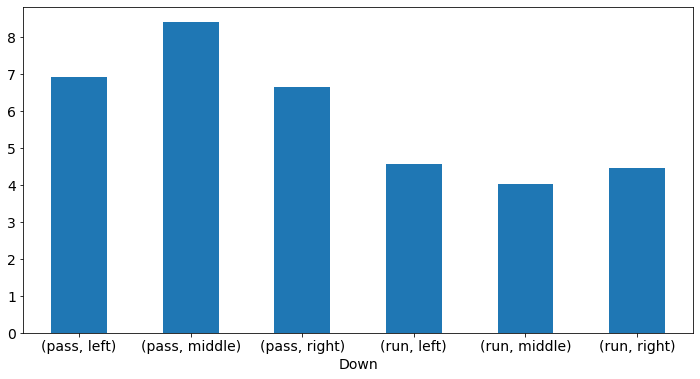

In [84]:
df_play_dir.groupby(['play_type','direction'])['yards_gained'].mean().plot(kind='bar',figsize=(12,6), fontsize= 14, rot = 0)
plt.xlabel('Down', fontsize=14)

Text(0.5, 0, 'Down')

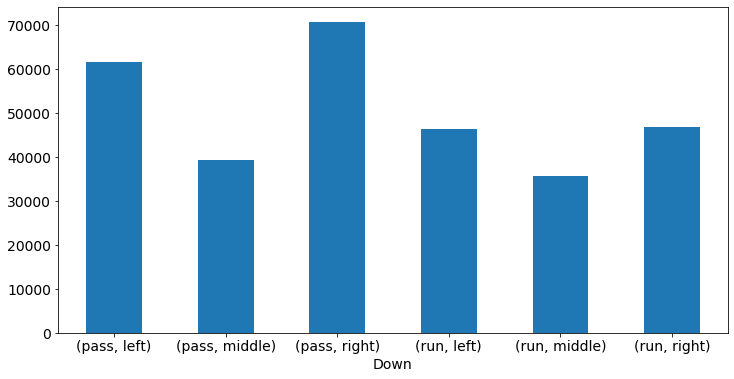

In [329]:
df_play_dir.groupby(['play_type','direction'])['yards_gained'].count().plot(kind='bar',figsize=(12,6), fontsize= 14, rot = 0)
plt.xlabel('Down', fontsize=14)

In [98]:
team_dir_df = df_play_dir.groupby(['play_type','direction','posteam'])['yards_gained'].count().unstack(level=1)

In [105]:
team_dir_df['mid_rat'] = team_dir_df['middle']/(team_dir_df['middle']+team_dir_df['left']+team_dir_df['right'])
team_dir_df['left_rat'] = team_dir_df['left']/(team_dir_df['middle']+team_dir_df['left']+team_dir_df['right'])
team_dir_df['right_rat'] = team_dir_df['right']/(team_dir_df['middle']+team_dir_df['left']+team_dir_df['right'])

In [106]:
team_dir_df

direction          left  middle  right   mid_rat  left_rat  right_rat
play_type posteam                                                    
pass      ARI      1989    1282   2309  0.229749  0.356452   0.413799
          ATL      2116    1370   2309  0.236411  0.365142   0.398447
          BAL      1650    1589   2353  0.284156  0.295064   0.420780
          BUF      1928     837   2123  0.171236  0.394435   0.434329
          CAR      1895     954   2063  0.194218  0.385790   0.419992
          CHI      1787    1113   2196  0.218407  0.350667   0.430926
          CIN      1737    1289   2190  0.247124  0.333014   0.419862
          CLE      1830    1062   2365  0.202016  0.348107   0.449876
          DAL      1913    1275   2115  0.240430  0.360739   0.398831
          DEN      2266    1146   2142  0.206338  0.407994   0.385668
          DET      2076    1495   2506  0.246010  0.341616   0.412375
          GB       1901    1191   2398  0.216940  0.346266   0.436794
          HOU      1909    1465   1964  0.274447  0.357625   0.367928
          IND      2199    1318   2330  0.225415  0.376090   0.398495
          JAX      1877    1261   2204  0.236054  0.351367   0.412580
          KC       1774    1050   2153  0.210970  0.356440   0.432590
          LAC      2066    1320   2071  0.241891  0.378596   0.379513
          LAR      1823    1106   2270  0.212733  0.350644   0.436622
          MIA      1893    1050   2285  0.200842  0.362089   0.437070
          MIN      1700    1066   2345  0.208570  0.332616   0.458814
          NE       2336    1487   1975  0.256468  0.402898   0.340635
          NO       2330    1305   2435  0.214992  0.383855   0.401153
          NYG      1978    1474   2109  0.265060  0.355691   0.379248
          NYJ      1779    1083   2098  0.218347  0.358669   0.422984
          OAK      1904    1296   2193  0.240312  0.353050   0.406638
          PHI      2122    1204   2287  0.214502  0.378051   0.407447
          PIT      1817    1548   2167  0.279826  0.328453   0.391721
          SEA      1728     925   2150  0.192588  0.359775   0.447637
          SF       1760     962   2106  0.199254  0.364540   0.436205
          TB       1979    1230   2144  0.229778  0.369699   0.400523
          TEN      1674     996   2267  0.201742  0.339072   0.459186
          WAS      1780    1545   1991  0.290632  0.334838   0.374530
run       ARI      1084    1385   1146  0.383126  0.299862   0.317012
          ATL      1615     652   1570  0.169924  0.420902   0.409174
          BAL      1729     673   1755  0.161896  0.415925   0.422179
          BUF      1426    1429   1475  0.330023  0.329330   0.340647
          CAR      1559    1365   1499  0.308614  0.352476   0.338910
          CHI      1713     549   1673  0.139517  0.435324   0.425159
          CIN      1687     720   1762  0.172703  0.404653   0.422643
          CLE      1499     648   1658  0.170302  0.393955   0.435742
          DAL      1524    1021   1514  0.251540  0.375462   0.372998
          DEN      1321    1465   1374  0.352163  0.317548   0.330288
          DET      1364     959   1345  0.261450  0.371865   0.366685
          GB       1550     770   1549  0.199018  0.400620   0.400362
          HOU      1653    1139   1664  0.255610  0.370961   0.373429
          IND      1184    1447   1154  0.382299  0.312814   0.304888
          JAX      1119    1791   1080  0.448872  0.280451   0.270677
          KC       1267    1588   1352  0.377466  0.301165   0.321369
          LAC      1187    1651   1141  0.414928  0.298316   0.286755
          LAR      1313    1180   1433  0.300560  0.334437   0.365003
          MIA      1384    1101   1371  0.285529  0.358921   0.355550
          MIN      1371    1248   1493  0.303502  0.333414   0.363084
          NE       1682    1200   1378  0.281690  0.394836   0.323474
          NO       1586     559   1771  0.142748  0.405005   0.452247
          NYG      1449     922   1471  0.239979  0.377147   0.382874
          

In [107]:
df_play_dir_18 = df_play_dir[df_play_dir['year'] == '2018'] 
team_dir_df_18 = df_play_dir_18.groupby(['play_type','direction','posteam'])['yards_gained'].count().unstack(level=1)
team_dir_df_18['mid_rat'] = team_dir_df_18['middle']/(team_dir_df_18['middle']+team_dir_df_18['left']+team_dir_df_18['right'])
team_dir_df_18['left_rat'] = team_dir_df_18['left']/(team_dir_df_18['middle']+team_dir_df_18['left']+team_dir_df_18['right'])
team_dir_df_18['right_rat'] = team_dir_df_18['right']/(team_dir_df_18['middle']+team_dir_df_18['left']+team_dir_df_18['right'])
team_dir_df_18

direction          left  middle  right   mid_rat  left_rat  right_rat
play_type posteam                                                    
pass      ARI       180      93    191  0.200431  0.387931   0.411638
          ATL       237     142    209  0.241497  0.403061   0.355442
          BAL       129     184    190  0.365805  0.256461   0.377734
          BUF       168      63    210  0.142857  0.380952   0.476190
          CAR       180      96    218  0.194332  0.364372   0.441296
          CHI       142     117    216  0.246316  0.298947   0.454737
          CIN       177     123    210  0.241176  0.347059   0.411765
          CLE       169      98    231  0.196787  0.339357   0.463855
          DAL       200      82    204  0.168724  0.411523   0.419753
          DEN       179      84    222  0.173196  0.369072   0.457732
          DET       181     128    221  0.241509  0.341509   0.416981
          GB        241      99    226  0.174912  0.425795   0.399293
          HOU       151     110    158  0.262530  0.360382   0.377088
          IND       204     142    231  0.246101  0.353553   0.400347
          JAX       148     142    223  0.276803  0.288499   0.434698
          KC        177     106    242  0.201905  0.337143   0.460952
          LAC       157     123    185  0.264516  0.337634   0.397849
          LAR       207     136    204  0.248629  0.378428   0.372943
          MIA       148     109    173  0.253488  0.344186   0.402326
          MIN       181     113    241  0.211215  0.338318   0.450467
          NE        220     138    190  0.251825  0.401460   0.346715
          NO        178      91    201  0.193617  0.378723   0.427660
          NYG       199     107    229  0.200000  0.371963   0.428037
          NYJ       182      98    202  0.203320  0.377593   0.419087
          OAK       194     134    191  0.258189  0.373796   0.368015
          PHI       194      94    257  0.172477  0.355963   0.471560
          PIT       202     205    197  0.339404  0.334437   0.326159
          SEA       156      86    137  0.226913  0.411609   0.361478
          SF        182     136    165  0.281573  0.376812   0.341615
          TB        217     152    196  0.269027  0.384071   0.346903
          TEN       167      99    133  0.248120  0.418546   0.333333
          WAS       177     134    159  0.285106  0.376596   0.338298
run       ARI        56     196     71  0.606811  0.173375   0.219814
          ATL       164      12    127  0.039604  0.541254   0.419142
          BAL       142      94    195  0.218097  0.329466   0.452436
          BUF       144     135    158  0.308924  0.329519   0.361556
          CAR       101     130    119  0.371429  0.288571   0.340000
          CHI       183      61    150  0.154822  0.464467   0.380711
          CIN       127      73    121  0.227414  0.395639   0.376947
          CLE       153      42    180  0.112000  0.408000   0.480000
          DAL       152     117    137  0.288177  0.374384   0.337438
          DEN        92     126    107  0.387692  0.283077   0.329231
          DET       141     116     99  0.325843  0.396067   0.278090
          GB        125      88     98  0.282958  0.401929   0.315113
          HOU       130     118    153  0.294264  0.324190   0.381546
          IND       109     145     92  0.419075  0.315029   0.265896
          JAX        99     203     85  0.524548  0.255814   0.219638
          KC         81     139    112  0.418675  0.243976   0.337349
          LAC       134     110    112  0.308989  0.376404   0.314607
          LAR       151      84    137  0.225806  0.405914   0.368280
          MIA       123     111     96  0.336364  0.372727   0.290909
          MIN       114      85     93  0.291096  0.390411   0.318493
          NE        145     131    118  0.332487  0.368020   0.299492
          NO        143      58    228  0.135198  0.333333   0.531469
          NYG       121      99     94  0.315287  0.385350   0.299363
          

In [139]:
for i in range(len(team_dir_df_18)):
    team_dir_df_18['range_of_rat'][i]=max(team_dir_df_18['mid_rat'][i],team_dir_df_18['right_rat'][i],team_dir_df_18['left_rat'][i])-min(team_dir_df_18['mid_rat'][i],team_dir_df_18['right_rat'][i],team_dir_df_18['left_rat'][i])

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [144]:
team_dir_df_18['range_of_rat']['pass'].sort_values()

posteam
PIT    0.013245
WAS    0.091489
SF     0.095238
HOU    0.114558
TB     0.115044
OAK    0.115607
BAL    0.121272
LAR    0.129799
LAC    0.133333
MIA    0.148837
NE     0.149635
IND    0.154246
JAX    0.157895
ATL    0.161565
TEN    0.170426
CIN    0.170588
DET    0.175472
SEA    0.184697
CHI    0.208421
ARI    0.211207
NYJ    0.215768
NYG    0.228037
NO     0.234043
MIN    0.239252
CAR    0.246964
GB     0.250883
DAL    0.251029
KC     0.259048
CLE    0.267068
DEN    0.284536
PHI    0.299083
BUF    0.333333
Name: range_of_rat, dtype: float64

In [145]:
team_dir_df_18['range_of_rat']['run'].sort_values()

posteam
TEN    0.046729
BUF    0.052632
SEA    0.053648
LAC    0.067416
NE     0.068528
OAK    0.077381
TB     0.077810
MIA    0.081818
CAR    0.082857
NYG    0.085987
DAL    0.086207
HOU    0.087282
NYJ    0.094444
MIN    0.099315
DEN    0.104615
SF     0.106771
PHI    0.114706
DET    0.117978
GB     0.118971
PIT    0.136943
IND    0.153179
CIN    0.168224
KC     0.174699
WAS    0.177898
LAR    0.180108
BAL    0.234339
JAX    0.304910
CHI    0.309645
CLE    0.368000
NO     0.396270
ARI    0.433437
ATL    0.501650
Name: range_of_rat, dtype: float64

In [146]:
average_range_of_rat = []
for i in range(len(team_dir_df_18)):
    average_range_of_rat.append((team_dir_df_18['range_of_rat']['pass']+team_dir_df_18['range_of_rat']['run'])/2)

In [168]:
average_range_of_rat=average_range_of_rat[0]

In [171]:
average_range_of_rat.sort_values()

posteam
PIT    0.075094
TB     0.096427
OAK    0.096494
LAC    0.100375
HOU    0.100920
SF     0.101004
TEN    0.108578
NE     0.109081
MIA    0.115328
SEA    0.119172
WAS    0.134693
DET    0.146725
IND    0.153713
LAR    0.154953
NYJ    0.155106
NYG    0.157012
CAR    0.164910
DAL    0.168618
MIN    0.169284
CIN    0.169406
BAL    0.177806
GB     0.184927
BUF    0.192982
DEN    0.194576
PHI    0.206894
KC     0.216873
JAX    0.231402
CHI    0.259033
NO     0.315156
CLE    0.317534
ARI    0.322322
ATL    0.331607
Name: range_of_rat, dtype: float64

In [332]:
atl_test = df[df['posteam']=='ATL']
atl_test = atl_test[atl_test['game_date'].str.contains('2018')]

In [340]:
df.pass_length.value_counts()

short    139609
deep      31793
Name: pass_length, dtype: int64